In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/dataset/Advertising.csv
/kaggle/input/dataset/Hitters.csv


# 1- Linear Regression Model
Linear Regression is a linear approach to modeling the relationship between a scaler response and one or more explanatory variables. The case of one explanatory variable is called simple *linear regression* .

In [2]:

import pandas as pd
df = pd.read_csv("/kaggle/input/dataset/Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info

<bound method DataFrame.info of         TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

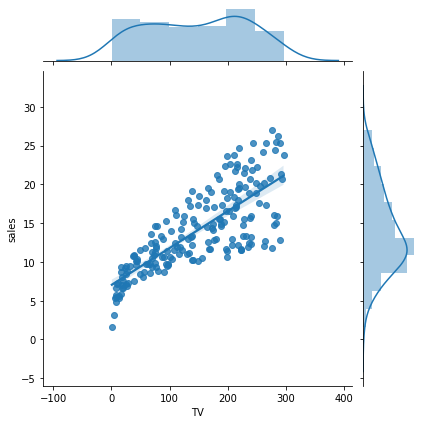

In [4]:
import seaborn as sns
sns.jointplot(x="TV", y="sales", data=df, kind="reg");

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X = df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [7]:
y = df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [8]:
reg = LinearRegression()
model = reg.fit(X,y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#Let's learn the model
str(model)

'LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)'

In [10]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [11]:
#beta 0 (n) in basic linear regression formul(mx+n)
model.intercept_  

array([7.03259355])

In [12]:
#beta 1 (m) in basic linear regression formul(mx+n)
model.coef_

array([[0.04753664]])

In [13]:
#r2 
#Percentage of change in dependent variable explained by independent variables
model.score(X,y)
#The change in the independent variable is about 60 percent explained.

0.611875050850071

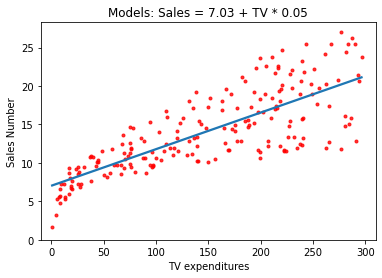

In [14]:
#guess
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.regplot(df["TV"],df["sales"], ci=None, scatter_kws= {"color":"r","s":9})

#set table
g.set_title("Models: Sales = 7.03 + TV * 0.05")  
g.set_ylabel("Sales Number")
g.set_xlabel("TV expenditures")

plt.xlim(-10,310)
plt.ylim(bottom=0);

In [15]:
#Real Value 
7.03+ 0.05*165

15.280000000000001

In [16]:
#Predict Value
model.predict([[165]])

array([[14.87613922]])

In [17]:
new_data = [[5],[150],[300],[450]]

In [18]:
model.predict(new_data)

array([[ 7.27027675],
       [14.16308961],
       [21.29358568],
       [28.42408174]])

In [19]:
#Expected 2D array, got 1D array instead
#Value Error expected : model.predict([500])
model.predict([[500]])
#predict : ~30

array([[30.80091377]])

In [20]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


**Residues and Their Importance in Machine Learning**
*  MSE : Mean squared error
* RMSE : Root mean squared error

In [21]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [22]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [23]:
model.predict(X)[0:6]


array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [24]:
real_y = y[0:10]

In [25]:
predict_y = pd.DataFrame(model.predict(X)[0:10])

In [26]:
errors = pd.concat([real_y,predict_y], axis=1)
errors.columns = ["real_y","predict_y"]
errors

,real_y,predict_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [27]:
errors["error"] = errors["real_y"] - errors["predict_y"]
errors

,real_y,predict_y,error
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


### MSE
**As you can see, the error values can be minus, and we will take the squaring process to  take care of it and we will take the average. In this way, we will have MSE**

In [28]:
errors["mean_squared"] = errors["error"]**2

In [29]:
errors

,real_y,predict_y,error,mean_squared
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [30]:
import numpy as np
MSE = np.mean(errors["mean_squared"])
print("MSE : ", MSE)

MSE :  9.290350329638102


# 2 - Multiple Linear Regression

In [31]:
#Model
import numpy as np
import pandas as pd
df = pd.read_csv("/kaggle/input/dataset/Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [32]:
X = df.drop("sales",axis=1)
y = df[["sales"]]

In [33]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [34]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [35]:
#Model : wtih Sklearn 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [36]:
model = lm.fit(X, y)

In [37]:
# mx+n --> intercept = n
model.intercept_

array([2.93888937])

In [38]:
#mx+n --> coef = m
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

## Predict
** Sales = 2.94 + (TV * 0.04) + (radio * 0.19) -(newspaper*0.001) 
* 30  TV , 10  radio , 40 newspaper

In [39]:
2.94 + (30 * 0.04) + (10 * 0.19) -(40 * 0.001)

5.999999999999999

In [40]:
new_data = [[30],[10],[50]]

In [41]:
import pandas as pd
new_data = pd.DataFrame(new_data).T
new_data

,0,1,2
0,30,10,50


In [42]:
model.predict(new_data)

array([[6.14525425]])

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [45]:
model.predict(X)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [46]:
MSE = mean_squared_error(y,model.predict(X))
MSE

2.784126314510936

In [47]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

1.6685701407225697

## Model Tuning

In [48]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [49]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =99)

In [52]:
#X_test.ndim
X_test.shape

(40, 3)

In [53]:
X_train.shape

(160, 3)

In [54]:
X_train.head()

,TV,radio,newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7


In [55]:
y_train.head()

,sales
16,12.5
51,10.7
97,15.5
164,11.9
71,12.4


In [56]:
y_test.head()

,sales
135,11.6
127,8.8
191,9.9
66,9.5
119,6.6


In [57]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [58]:
#Error train value
y_predict_train = model.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_predict_train))

1.723682482265075

In [59]:
#Error test value
y_predict_test = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_predict_test))

1.4312783138301646

### K-fold Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# cv mse
cross_val_score(model, X_train, y_train, cv=10, scoring = "neg_mean_squared_error")

array([-2.1019073 , -2.48953197, -3.09704214, -2.34694216, -3.68175761,
       -1.8691401 , -3.18173007, -4.1927349 , -2.17128376, -8.03821974])

In [63]:
np.mean(-cross_val_score(model, X_train, y_train, cv=10, scoring = "neg_mean_squared_error"))

3.3170289742341255

In [64]:
# cv root mse
import numpy as np
RMSE = np.sqrt(np.mean(-cross_val_score(model, X_train, y_train, cv=10, scoring = "neg_mean_squared_error")))
RMSE

1.8212712522395245

In [65]:
P = np.sqrt(np.mean(-cross_val_score(model, X, y, cv=10, scoring = "neg_mean_squared_error")))

In [66]:
error =  P - RMSE 
error

-0.07199493955518643

# 4- Ridge Regression

### Required libraries

In [67]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [68]:
#Data Set
df = pd.read_csv("/kaggle/input/dataset/Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                    random_state=42)

In [69]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [70]:
df.shape

(263, 20)

In [71]:
ridge_model = Ridge(alpha = 5).fit(X_train, y_train)

In [72]:
ridge_model

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [73]:
ridge_model.coef_

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [74]:
ridge_model.intercept_

-3.4251968687181034

In [75]:
# generating random numbers (from 10 to 2)
np.linspace(10,2,100)

array([10.        ,  9.91919192,  9.83838384,  9.75757576,  9.67676768,
        9.5959596 ,  9.51515152,  9.43434343,  9.35353535,  9.27272727,
        9.19191919,  9.11111111,  9.03030303,  8.94949495,  8.86868687,
        8.78787879,  8.70707071,  8.62626263,  8.54545455,  8.46464646,
        8.38383838,  8.3030303 ,  8.22222222,  8.14141414,  8.06060606,
        7.97979798,  7.8989899 ,  7.81818182,  7.73737374,  7.65656566,
        7.57575758,  7.49494949,  7.41414141,  7.33333333,  7.25252525,
        7.17171717,  7.09090909,  7.01010101,  6.92929293,  6.84848485,
        6.76767677,  6.68686869,  6.60606061,  6.52525253,  6.44444444,
        6.36363636,  6.28282828,  6.2020202 ,  6.12121212,  6.04040404,
        5.95959596,  5.87878788,  5.7979798 ,  5.71717172,  5.63636364,
        5.55555556,  5.47474747,  5.39393939,  5.31313131,  5.23232323,
        5.15151515,  5.07070707,  4.98989899,  4.90909091,  4.82828283,
        4.74747475,  4.66666667,  4.58585859,  4.50505051,  4.42

In [76]:
lambdas = 10** np.linspace(10,2,100)*0.5
lambdas

array([5.00000000e+09, 4.15108784e+09, 3.44630605e+09, 2.86118383e+09,
       2.37540508e+09, 1.97210303e+09, 1.63727458e+09, 1.35929412e+09,
       1.12850986e+09, 9.36908711e+08, 7.77838072e+08, 6.45774833e+08,
       5.36133611e+08, 4.45107543e+08, 3.69536102e+08, 3.06795364e+08,
       2.54706901e+08, 2.11462144e+08, 1.75559587e+08, 1.45752653e+08,
       1.21006413e+08, 1.00461650e+08, 8.34050269e+07, 6.92443186e+07,
       5.74878498e+07, 4.77274228e+07, 3.96241449e+07, 3.28966612e+07,
       2.73113861e+07, 2.26743925e+07, 1.88246790e+07, 1.56285792e+07,
       1.29751211e+07, 1.07721735e+07, 8.94324765e+06, 7.42484131e+06,
       6.16423370e+06, 5.11765511e+06, 4.24876718e+06, 3.52740116e+06,
       2.92851041e+06, 2.43130079e+06, 2.01850863e+06, 1.67580133e+06,
       1.39127970e+06, 1.15506485e+06, 9.58955131e+05, 7.96141397e+05,
       6.60970574e+05, 5.48749383e+05, 4.55581378e+05, 3.78231664e+05,
       3.14014572e+05, 2.60700414e+05, 2.16438064e+05, 1.79690683e+05,
      

In [77]:
ridge_model = Ridge()
factor = []

for i in lambdas:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train, y_train)
    factor.append(ridge_model.coef_)

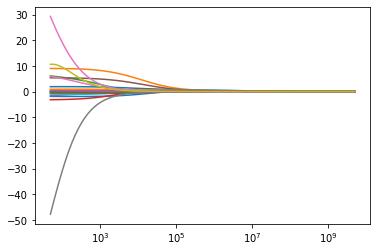

In [78]:
ax = plt.gca()
ax.plot(lambdas,factor)
ax.set_xscale("log")

## Predict

In [79]:
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_train)

In [80]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [81]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [82]:
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))  
RMSE

289.34470696006565

In [83]:
#cv rmse
from sklearn.model_selection import cross_val_score 
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv=10, scoring = "neg_mean_squared_error")))

351.39315856063195

In [84]:
#test eror
y_pred = ridge_model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))  
RMSE

356.8082905730239

# Model Tuning

In [85]:
ridge_model= Ridge(alpha=1).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.8082905730239

In [86]:
np.random.randint(0,1000,100)

array([543, 692, 966, 901, 266, 489, 244, 161, 580,  24, 283, 909, 605,
       733, 727, 737, 528, 169, 862, 281, 203, 132, 206,  40, 741, 962,
       216, 128, 627, 792, 596, 489, 494, 828, 502, 451, 191, 215, 404,
       486, 619, 880, 869,  35, 497,  47, 608, 433, 800, 394, 680, 328,
       360, 217, 325,  16, 211, 102, 390,  85, 129, 807, 725, 860, 505,
       512, 734, 525, 683, 352, 427, 413, 500, 593, 616, 209, 501, 238,
        44, 377, 926, 704, 788, 832, 186, 827, 282, 911, 991, 428, 862,
       488, 893, 612, 188, 467, 176, 739, 347, 909])

In [87]:
lambda1 = np.random.randint(0,1000,100)
lambda2 = 10** np.linspace(10,2,100)*0.5

In [88]:
# pick one lambda 1 or lambda 2(you should try ) :)
ridgecv = RidgeCV(alphas = lambda1, scoring = "neg_mean_squared_error", cv=10, normalize=True )
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([519, 913, 263, 881, 938, 728, 530,  60, 838, 116, 559, 343, 636,
       246, 488, 785, 487, 196, 609, 615, 503, 708, 983, 691, 178, 150,
       938, 722, 396,  47, 990, 974, 407, 376, 311, 143, 189, 580, 754,
       625, 445, 853,  40, 845, 331, 740, 342, 973,  65, 842,  18, 643,
       333, 828, 665, 279, 198,  84, 315, 630,  47, 271, 908, 138, 813,
       553, 297, 743, 813, 238, 573, 382, 506, 921, 311, 675, 373, 717,
       367, 241, 931, 280, 467, 263, 364,  95, 147, 159, 797, 182, 254,
       347, 651, 403, 820, 960, 411, 227, 142, 878]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [89]:
ridgecv.alpha_ #(i think optimuim alpha = 2 )

18

In [90]:
#final model
ridge_tuned = Ridge(alpha=ridgecv.alpha_).fit(X_train, y_train)
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.40713661391317

#  4- Lasso Regression

In [91]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [92]:
#Data Set
df = pd.read_csv("/kaggle/input/dataset/Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                    random_state=42)

In [93]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [94]:
df.shape

(263, 20)

In [95]:
lasso_model = Lasso().fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850426, tolerance: 3898.6869563806586
  positive)


In [96]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [97]:
lasso_model.intercept_ 

-5.587450677335255

In [98]:
lasso_model.coef_ 

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [99]:
lasso = Lasso()
coefs = []
#alphas = np.random.randint(0,100000,10) #lambdas
alphas = lambdalar = 10** np.linspace(10,2,100)*0.5
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5715.37986363098, tolerance: 3898.6869563806586
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4932.240666225553, tolerance: 3898.6869563806586
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6239.827929269522, tolerance: 3898.6869563806586
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9299.69115

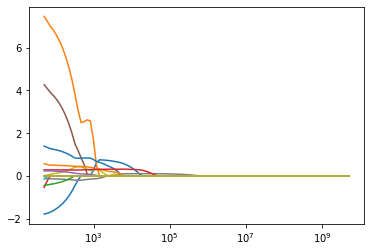

In [100]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

### Predict

In [101]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [103]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [104]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.09758845540324

In [105]:
r2_score(y_test, y_pred)

0.414227981323662

## Model Tuning

In [106]:
alphas = lambdalar = 10** np.linspace(10,2,100)*0.5
lasso_cv_model = LassoCV(alphas = alphas, cv=10, max_iter = 100000).fit(X_train, y_train)
lasso_cv_model.alpha_

183.91898859143134

In [107]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

362.9690579568043

In [108]:
pd.Series(lasso_tuned.coef_, index = X_train.columns)

AtBat         -1.142640
Hits           5.572397
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.814991
Years          0.000000
CAtBat        -0.169412
CHits          0.225415
CHmRun        -0.000000
CRuns          1.067389
CRBI           0.473191
CWalks        -0.216456
PutOuts        0.273053
Assists        0.178284
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

## 5-ElasticNet Regression

In [109]:
#library
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [110]:
#Data Set
df = pd.read_csv("/kaggle/input/dataset/Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                    random_state=42)

In [111]:
enet_model = ElasticNet().fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367338, tolerance: 3898.6869563806586
  positive)


In [112]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [113]:
enet_model.intercept_

-6.465955602112217

### Predict

In [114]:
enet_model.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [115]:
enet_model.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [116]:
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred)) 

357.1676548181244

In [117]:
r2_score(y_test, y_pred)

0.41070222469326934

### Model Tuning

In [118]:
enet_cv_model = ElasticNetCV(cv=10).fit(X_train, y_train)

In [119]:
enet_cv_model.alpha_

5230.7647364798695

In [120]:
enet_cv_model.intercept_

-38.5194055839429

In [121]:
enet_cv_model.coef_

array([ 0.62845434,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.09788752,  0.        ,
        0.27265769,  0.19270075,  0.00758665,  0.3106529 ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [122]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_ ).fit(X_train, y_train)
y_pred = enet_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795

# Unlinear Regressor

In [123]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [124]:
from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [125]:
#Data Set
df = pd.read_csv("/kaggle/input/dataset/Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                    random_state=42)

In [126]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


## Model & Predict

In [131]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [132]:
knn_model.n_neighbors

5

In [134]:
knn_model.metric

'minkowski'

In [136]:
dir(knn_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_algorithm_metric',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'n_samples_fit_',
 'p',
 'predict',
 'radius',
 'score',
 'set_params',
 'weights']

In [137]:
knn_model.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [139]:
y_pred = knn_model.predict(X_test)

In [140]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

## Model Tuning

In [141]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [145]:
RMSE = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    print("k = ", k, " for RMSE value : ", rmse)
    

k =  1  for RMSE value :  455.03925390751965
k =  2  for RMSE value :  415.99629571490965
k =  3  for RMSE value :  420.6765370082348
k =  4  for RMSE value :  428.8564674588792
k =  5  for RMSE value :  426.6570764525201
k =  6  for RMSE value :  423.5071669008732
k =  7  for RMSE value :  414.9361222421057
k =  8  for RMSE value :  413.7094731463598
k =  9  for RMSE value :  417.84419990871265
k =  10  for RMSE value :  421.6252180741266


### GridSearchCV
* Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.

In [149]:
knn_params = {"n_neighbors" : np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [151]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [152]:
#final model
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)

In [153]:
y_pred = knn_tuned.predict(X_test)

In [154]:
np.sqrt(mean_squared_error(y_test, y_pred))

413.7094731463598

# Support Vector Regression
* Support Vector Machine - Regression (SVR) Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences.

In [155]:
#Data Set
df = pd.read_csv("/kaggle/input/dataset/Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                    random_state=42)

## Model & Predict

In [157]:
svr_model = SVR("linear").fit(X_train, y_train)

In [160]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [162]:
svr_model.predict(X_train)[0:5]

array([219.32622169, 702.4303869 , 623.2055964 , 153.77538476,
       463.15190834])

In [163]:
svr_model.predict(X_test)[0:5]

array([679.14754685, 633.72883069, 925.68640849, 270.28463621,
       530.26659184])

In [164]:
svr_model.intercept_

array([-80.15196151])

In [165]:
svr_model.coef_

array([[ -1.21839037,   6.09602969,  -3.67574533,   0.14217075,
          0.51435919,   1.28388986,  12.55922537,  -0.08693755,
          0.46597184,   2.98259944,   0.52944523,  -0.79820799,
         -0.16015534,   0.30872794,   0.28842348,  -1.79560067,
          6.41868985, -10.74313783,   1.33374317]])

## Model Tuning

In [167]:
svr_model = SVR("linear")

In [168]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [172]:
svr_params = {"C":[0.1, 0.5, 1, 3]}

In [173]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=5).fit(X_train, y_train)

In [174]:
svr_cv_model.best_params_

{'C': 0.5}

In [178]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=5, verbose =2, n_jobs= -1).fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.6min finished


In [183]:
svr_cv_model.best_params_

{'C': 0.5}

In [184]:
#final model
svr_tuned = SVR("linear", C=0.5).fit(X_train, y_train)
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred)) 

367.9874739022889

In [185]:
# primitive error :370.04084185624924
# optımum value error :367.9874739022889

# Artificial Neural Networks
* An artificial neural network is an interconnected group of nodes, inspired by a simplification of neurons in a brain. Here, each circular node represents an artificial neuron and an arrow represents a connection from the output of one artificial neuron to the input of another.

In [186]:
#Data Set
df = pd.read_csv("/kaggle/input/dataset/Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                    random_state=42)

## Model & Predict

In [188]:
scaler = StandardScaler()

In [190]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [191]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [192]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [193]:
mlp_model.predict(X_test_scaled)[0:5]

array([17.51833897, 37.627527  , 64.65972676, 10.13146497, 21.2101672 ])

In [194]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

661.7309060330099

## Model Tuning

In [196]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [197]:
mlp_params = {"alpha":[0.1,0.01, 0.02, 0.001, 0.0001],
             "hidden_layer_sizes": [(10,20),(5,5),(100,100)] }

In [198]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv=10, verbose=2, n_jobs = -1).fit(X_train_scaled, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   16.3s finished


In [199]:
mlp_cv_model.best_params_

{'alpha': 0.02, 'hidden_layer_sizes': (100, 100)}

In [200]:
#final
mlp_tuned = MLPRegressor(alpha = 0.0001, hidden_layer_sizes = (100,100)).fit(X_train_scaled, y_train)

In [202]:
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

351.37502948825016

# CART(Classification and Regression Tree)

In [203]:
#Data Set
df = pd.read_csv("/kaggle/input/dataset/Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                    random_state=42)

In [204]:
X_train = pd.DataFrame(X_train["Hits"])
X_test  = pd.DataFrame(X_test["Hits"])

## Model & Predict

In [205]:
#cart_model = DecisionTreeRegressor()
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

In [207]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

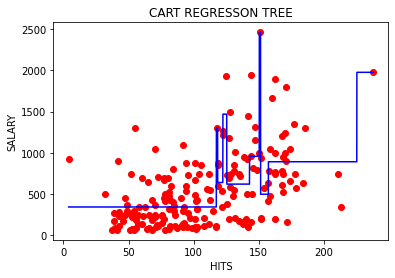

In [208]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X_train, y_train, color="red")

plt.plot(X_grid, cart_model.predict(X_grid), color = "blue")

plt.title("CART REGRESSON TREE")
plt.xlabel('HITS')
plt.ylabel('SALARY');

In [209]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [210]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

In [211]:
#Data Set
df = pd.read_csv("/kaggle/input/dataset/Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                    random_state=42)

In [212]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

534.8070909994018

## Model Tuning 

In [213]:
cart_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [214]:
cart_model = DecisionTreeRegressor(max_depth = 3).fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

391.5530522634767

In [215]:
?cart_model

In [216]:
cart_params = {"max_depth": [2,3,4,5,10,20],
              "min_samples_split": [2,10,5,30,50,100]}

In [217]:
cart_model = DecisionTreeRegressor()
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10).fit(X_train, y_train)
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [219]:
cart_tuned = DecisionTreeRegressor(max_depth=4, min_samples_split=50).fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.0876906511434

# Random Forests

In [222]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [221]:
#Data Set
df = pd.read_csv("/kaggle/input/dataset/Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                    random_state=42)

In [223]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)
rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [224]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.73852779396566

## Model Tuning
* **importand parametres** :
* *n_estimators*
* *min_samples_split*
* *max_depth*

In [225]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)
rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [226]:
rf_params = {"max_depth": [5,8,10],
            "max_features": [2,5,10],
            "n_estimators": [200,500,1000,2000],
            "min_samples_split": [2,10,80,100]}

In [228]:
rf_cv_model = GridSearchCV(rf_model,
                           rf_params, 
                           cv=10,
                           n_jobs=-1,
                           verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 17.8min finished


In [229]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
rf_model = RandomForestRegressor(random_state = 42,
                                 max_depth = 8,
                                 max_features=2,
                                 min_samples_split=2,
                                 n_estimators=200)# --> predict number
rf_tuned = rf_model.fit(X_train, y_train)

In [ ]:
rf_tuned

In [ ]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

### Variable Severity Level

In [ ]:
rf_tuned.feature_importances_

In [ ]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = 'Importance',
                       axis=0,
                      ascending = True).plot(kind = 'barh',
                                            color = 'r')

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# Gradient Boosting Machines 

In [186]:
#Data Set
df = pd.read_csv("/kaggle/input/dataset/Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                    random_state=42)

## Model & Predict

In [ ]:
gmb_model = GradientBoostingRegressor().fit(X_train, y_train)
gmb_model

In [ ]:
y_pred = gmb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
gbm_model

In [ ]:
gbm_params = {"learning_rate": [0.001, 0.01, 0.1],
             "max_depth": [3,5,8,],
             "n_estimators": [100,200,500],
             "subsample" : [1,0.5,0.8],
             "loss": ["ls","lad","quantile"]}

In [ ]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [ ]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

In [ ]:
gbm_cv_model.best_params_

In [ ]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                      loss = "lad",
                                      max_depth = 3,
                                      n_estimators = 500,
                                      subsample = 1
                                     ).fit(X_train, y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

### Variable Severity Level

In [ ]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = 'Importance',
                       axis=0,
                      ascending = True).plot(kind = 'barh',
                                            color = 'r')

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# XGBoost

In [ ]:
!pip install xgboost

In [186]:
#Data Set
df = pd.read_csv("/kaggle/input/dataset/Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                    random_state=42)

## Model & Predict

In [ ]:
import xgboost
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor().fit(X_train, y_train)
xgb

In [ ]:
y_pred = xgb.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
xgb = XGBRegressor()
xgb

In [ ]:
xgb_params = {"learning_rate": [0.1,0.01,0.5],
             "max_depth": [2,3,4,5,7,8],
             "n_estimators": [100,200,500,1000],
             "colsample_bytree": [0.4,0.7,0.9,1]}

In [ ]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose =2).fit(X_train, y_train)

In [ ]:
xgb_cv_model.best_params_

In [ ]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.7,learning_rate=0.5,max_depth=2,n_estimators = 1000).fit(X_train, y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# LightGBM

In [ ]:
!pip install lightgbm

In [186]:
#Data Set
df = pd.read_csv("/kaggle/input/dataset/Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                    random_state=42)

## Model & Predict

In [ ]:
lgb_model = LGBMRegressor().fit(X_train, y_train)
lgb_model 

In [ ]:
y_pred = lgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred)) 

## Model Tuning

In [ ]:
lgbm_params = {"learning_rate": [0.01, 0.1, 0.5, 1],
              "n_estimators": [20,40,100,200,500,1000],
              "max_depth": [1,2,4,5,6,7,8,9,10]}

In [ ]:
lgbm_cv_model = GridSearchCV(lgb_model, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned =  LGBMRegressor(learning_rate = 0.1,
                           max_depth=6,
                           n_estimators=20).fit(X_train, y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# CatBoost

In [ ]:
!pip install catboost

In [186]:
#Data Set
df = pd.read_csv("/kaggle/input/dataset/Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                    random_state=42)

## Model & Predict

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
catb_model

In [ ]:
catb_params = { "iterations" : [200,500,100],
              "learning_rate": [0.01,0.1],
              "depth": [3,6,8]}

In [ ]:
catb_model = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb_model,catb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(depth=6, iterations=100, learning_rate=0.1).fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))